Ayse Bilgin - 2019203159, Damla Kayikci - 2020400228, Kerem Yavuz - 2020300303

# Setup

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

df1 = pd.read_csv("gdp_data.csv", sep=";")
df1.rename(columns={"income":"gdp", "capital":"K", "labor":"L"}, inplace=True)
df1['logL'] = np.log(df1['L'])
df1['logK'] = np.log(df1['K'])

df2 = pd.read_csv("correl_pop.csv", sep=",")

# Q1

## a.

In [22]:
# reg
model = smf.ols(formula='gdp ~ logK + logL', data=df1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     971.4
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           2.99e-18
Time:                        13:19:16   Log-Likelihood:                -206.83
No. Observations:                  20   AIC:                             419.7
Df Residuals:                      17   BIC:                             422.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.518e+06   1.76e+05    -14.271      0.0

## b.

       gdp     fitted_gdp     residuals
0   114043   96558.726865  17484.273135
1   120410  110172.106088  10237.893912
2   129187  122783.318055   6403.681945
3   134705  133126.590949   1578.409051
4   139960  142942.828737  -2982.828737
5   150511  154117.521516  -3606.521516
6   157897  165159.945505  -7262.945505
7   165286  175374.844531 -10088.844531
8   178491  186985.202856  -8494.202856
9   199457  201945.689500  -2488.689500
10  212323  216104.901129  -3781.901129
11  226977  231437.790602  -4460.790602
12  241194  248073.041859  -6879.041859
13  260881  264359.376345  -3478.376345
14  277498  281004.285489  -3506.285489
15  296530  297126.309289   -596.309289
16  306712  310958.642132  -4246.642132
17  329030  326650.838276   2379.161724
18  354057  343352.323383  10704.676617
19  374977  361891.716895  13085.283105

Estimated Parameters:
Intercept   -2.518132e+06
logK        -1.208071e+04
logL         2.248708e+05
dtype: float64

Model Summary:
                            

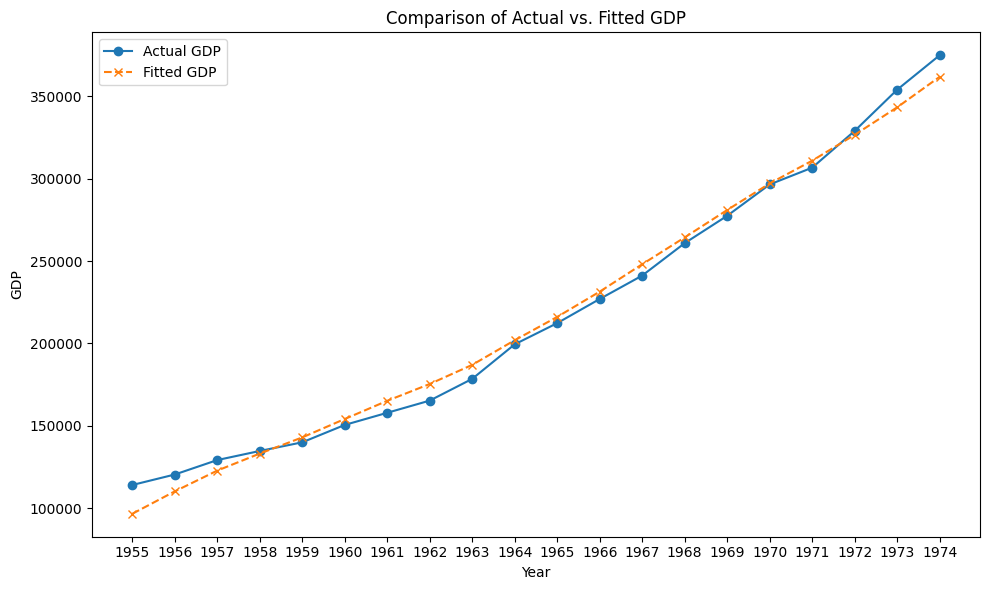

In [ ]:
df1['fitted_gdp'] = model.fittedvalues
df1['residuals'] = model.resid
print(df1[['gdp', 'fitted_gdp', 'residuals']])
#plotting
print("\nEstimated Parameters:")
print(model.params)
print("\nModel Summary:")
print(model.summary())

plt.figure(figsize=(10, 6))
plt.plot(df1['date'], df1['gdp'], label='Actual GDP', marker='o', linestyle='-')
plt.plot(df1['date'], df1['fitted_gdp'], label='Fitted GDP', linestyle='--', marker='x')
plt.xticks(ticks=range(int(df1['date'].min()), int(df1['date'].max()) + 1, 1))
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Comparison of Actual vs. Fitted GDP')
plt.tight_layout()
plt.show()


Since R^2 is 0.991 (which means 99.1% of the variation in GDP explained by the model), the model demonstrates a very good fit.  When we look at the coefficients log(K) is -1.208e+04 and log (L) is 2.249e+05. This means log(L) positively impacts GDP while log(K) negatively impacts. The effect of this negative impact is small and possibly due to data limitations or collinearity. Residuals are small and F-statistic with an approximately 0 value confirms the statistical significance of the model. In the plot there are only minor deviations between actual and fices GDP. ıt become more visible for the lowest and highest GDP’s. Overall, the model effectively explains GDP but we should be careful about negative coefficient and potential heteroscedasticity.

## c. - d.

In [24]:
# c and d
np.random.seed(300)
n = len(df1)
sigma = model.resid.std()

# Define error distributions
error_distributions = ['Normal','t(5)','t(10)','t(20)','t(25)','t(100)']

# Monte Carlo Simulation settings
simulations = 1000  # Number of Monte Carlo simulations
mc_results = {}
for dist_name in error_distributions:
    b0 = np.full(simulations, np.nan)  # Intercept estimates
    b1 = np.full(simulations, np.nan)  # logK coefficient estimates
    b2 = np.full(simulations, np.nan)  # logL coefficient estimates

    for sim in range(simulations):
        if dist_name == 'Normal':
            errors = np.random.normal(0, sigma, n)
        else:
            df = int(dist_name.split('(')[1].strip(')'))
            errors = np.random.standard_t(df, size=n) * sigma

        simulated_gdp = model.predict() + errors
        simulated_df = df1.copy()
        simulated_df['simulated_gdp'] = simulated_gdp
        sim_model = smf.ols(formula='simulated_gdp ~ logK + logL', data=simulated_df).fit()

        b0[sim] = sim_model.params['Intercept']
        b1[sim] = sim_model.params['logK']
        b2[sim] = sim_model.params['logL']

    # Store results for this error distribution
    mc_results[dist_name] = {
        'Intercept': b0,
        'logK': b1,
        'logL': b2,
    }

true_params = model.params

# MC means and SEs
mc_summary = pd.DataFrame(index=['Intercept', 'logK', 'logL'])

for dist_name, params in mc_results.items():
    mc_summary[f'{dist_name} Mean'] = [np.mean(params['Intercept']), np.mean(params['logK']), np.mean(params['logL'])]
    mc_summary[f'{dist_name} SE'] = [np.std(params['Intercept']), np.std(params['logK']), np.std(params['logL'])]

# plotting
print("\nTrue Results:")
print(model.params)
print("\nMonte Carlo Simulation Results:")
print(mc_summary)


True Results:
Intercept   -2.518132e+06
logK        -1.208071e+04
logL         2.248708e+05
dtype: float64

Monte Carlo Simulation Results:
            Normal Mean      Normal SE     t(5) Mean        t(5) SE  \
Intercept -2.514157e+06  160805.556704 -2.523899e+06  215684.165188   
logK      -1.294121e+04   49024.677326 -1.026557e+04   65735.776179   
logL       2.251837e+05   24685.181146  2.239969e+05   32834.964722   

             t(10) Mean       t(10) SE    t(20) Mean       t(20) SE  \
Intercept -2.523185e+06  190931.194604 -2.518949e+06  171717.563296   
logK      -1.089616e+04   58777.305044 -1.269559e+04   52000.182648   
logL       2.243960e+05   29508.196166  2.253813e+05   25999.867051   

             t(25) Mean       t(25) SE   t(100) Mean      t(100) SE  
Intercept -2.507873e+06  174753.290961 -2.524990e+06  169343.992982  
logK      -1.465968e+04   53415.831465 -1.024545e+04   51721.388066  
logL       2.259576e+05   26692.043558  2.240638e+05   25880.853855  


## e.

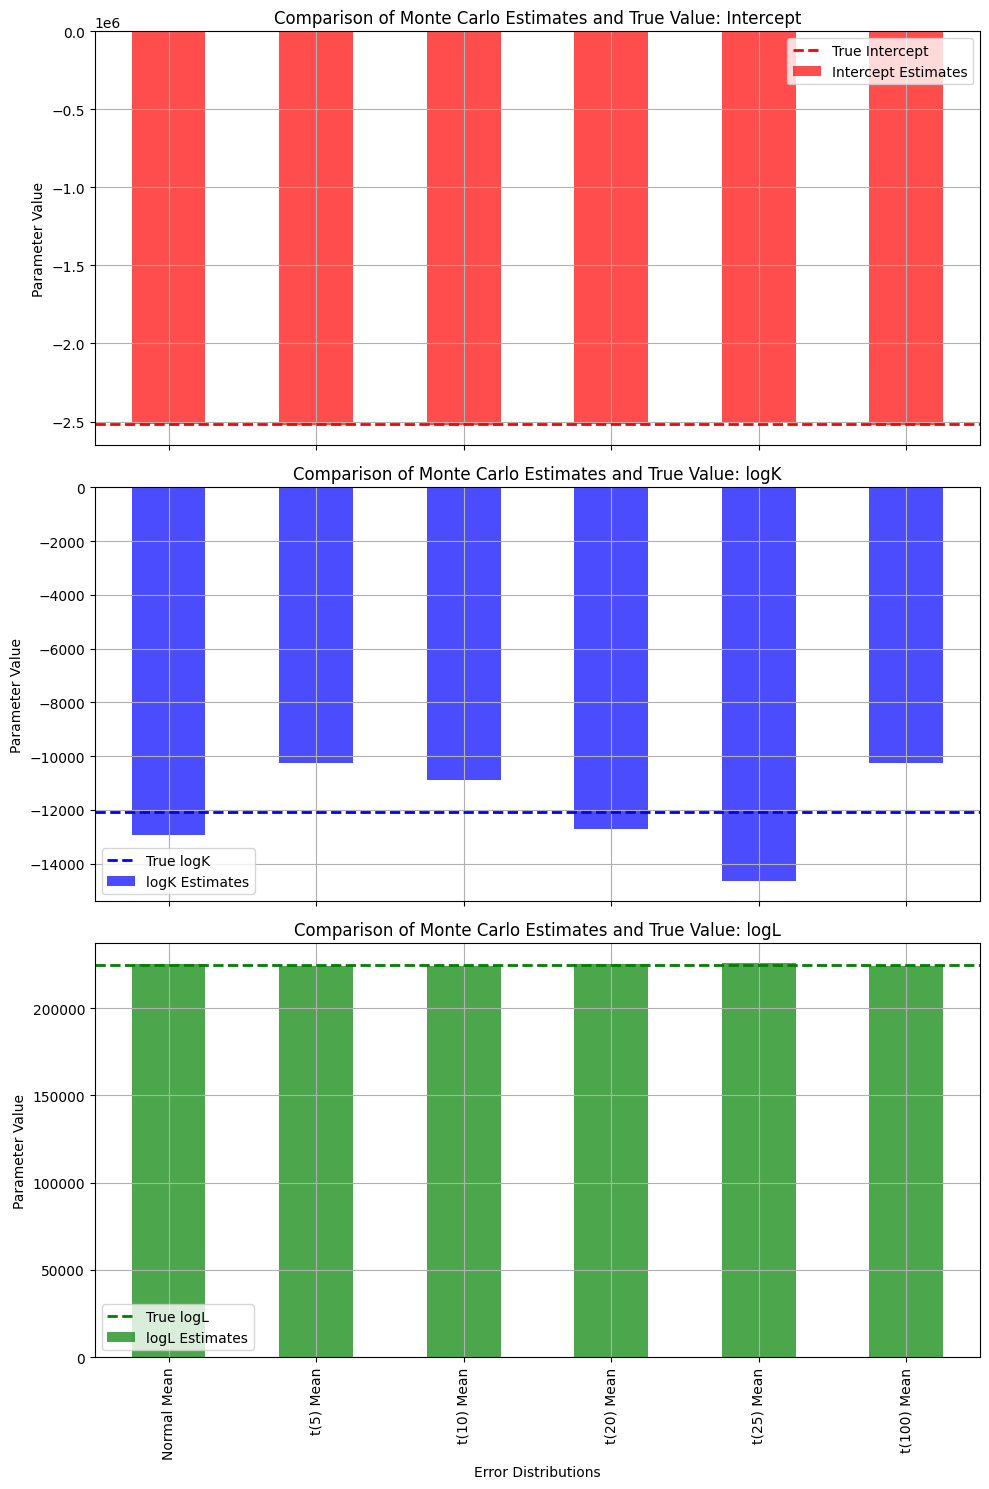

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
parameters = ['Intercept', 'logK', 'logL']
colors = ['red', 'blue', 'green']
for i, param in enumerate(parameters):
    mc_summary.filter(like='Mean').T[param].plot(kind='bar', ax=axes[i], color=colors[i], alpha=0.7, label=f'{param} Estimates')
    axes[i].axhline(true_params[param], color=colors[i], linestyle='--', linewidth=2, label=f'True {param}')
    axes[i].set_title(f'Comparison of Monte Carlo Estimates and True Value: {param}')
    axes[i].set_ylabel('Parameter Value')
    axes[i].legend()
    axes[i].grid(True)
axes[-1].set_xlabel('Error Distributions')
plt.tight_layout()
plt.show()

## f.

In [26]:
ols_variance = model.cov_params()
ols_se = model.bse

print("\nInitial OLS Regression (Part A):")
print("Variance:")
print(ols_variance)
print("\nSE:")
print(ols_se)

# Initialize an empty list to collect rows
results = []

# Compute variance and SE for each parameter and error distribution
for dist_name in error_distributions:
    for param in ['Intercept', 'logK', 'logL']:
        # Variance for this parameter across simulations
        avg_variance = np.var(mc_results[dist_name][param])
        # SE for this parameter from the summary
        avg_se = mc_summary.loc[param, f'{dist_name} SE']

        # Collect the results as a dictionary
        results.append({
            'Error Distribution': dist_name,
            'Parameter': param,
            'Avg Variance': avg_variance,
            'Avg SE': avg_se
        })

# Convert the list of dictionaries into a DataFrame
mc_avg_var_se = pd.DataFrame(results)

# Display the results
print("\nAverage Variance and SE for Each Error Distribution:")
print(mc_avg_var_se)

comparison_table = pd.DataFrame({
    "Parametric SE": ols_se,
})



Initial OLS Regression (Part A):
Variance:
              Intercept          logK          logL
Intercept  3.113404e+10 -8.911081e+09  4.085652e+09
logK      -8.911081e+09  2.922484e+09 -1.442429e+09
logL       4.085652e+09 -1.442429e+09  7.365961e+08

SE:
Intercept    176448.402971
logK          54060.007454
logL          27140.304052
dtype: float64

Average Variance and SE for Each Error Distribution:
   Error Distribution  Parameter  Avg Variance         Avg SE
0              Normal  Intercept  2.585843e+10  160805.556704
1              Normal       logK  2.403419e+09   49024.677326
2              Normal       logL  6.093582e+08   24685.181146
3                t(5)  Intercept  4.651966e+10  215684.165188
4                t(5)       logK  4.321192e+09   65735.776179
5                t(5)       logL  1.078135e+09   32834.964722
6               t(10)  Intercept  3.645472e+10  190931.194604
7               t(10)       logK  3.454772e+09   58777.305044
8               t(10)       logL  8

## g.


Comparison of Parametric SEs with Monte Carlo Average SEs:
           Parametric SE  Normal MC Avg SE  t(5) MC Avg SE  t(10) MC Avg SE  \
Intercept  176448.402971     160805.556704   215684.165188    190931.194604   
logK        54060.007454      49024.677326    65735.776179     58777.305044   
logL        27140.304052      24685.181146    32834.964722     29508.196166   

           t(20) MC Avg SE  t(25) MC Avg SE  t(100) MC Avg SE  
Intercept    171717.563296    174753.290961     169343.992982  
logK          52000.182648     53415.831465      51721.388066  
logL          25999.867051     26692.043558      25880.853855  


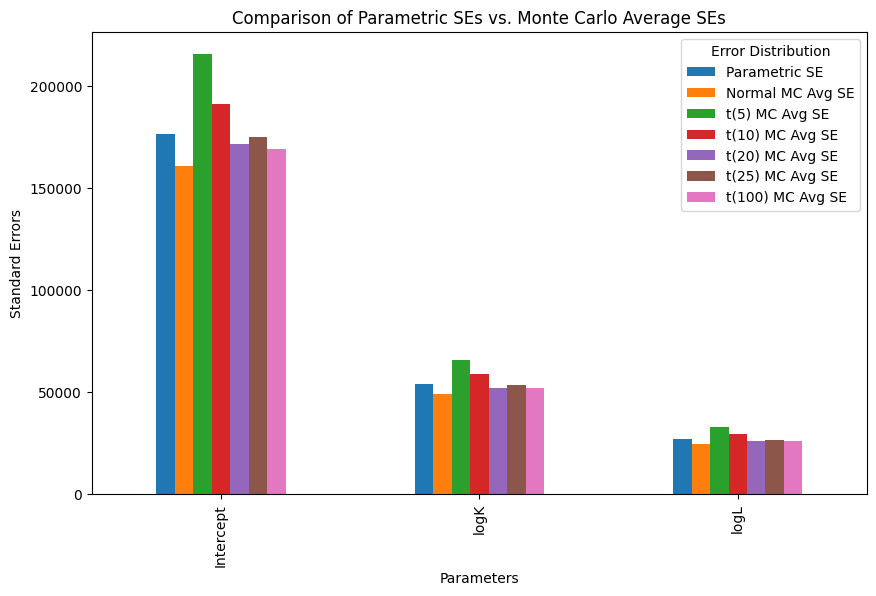

In [27]:
for dist_name in error_distributions:
    comparison_table[f"{dist_name} MC Avg SE"] = mc_summary[f"{dist_name} SE"]

print("\nComparison of Parametric SEs with Monte Carlo Average SEs:")
print(comparison_table)

# Optional: Visualization
comparison_table.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Parametric SEs vs. Monte Carlo Average SEs")
plt.ylabel("Standard Errors")
plt.xlabel("Parameters")
plt.legend(title="Error Distribution")
plt.show()

## h.


Parametric Confidence Intervals:

5% Significance Level:
                  Lower         Upper
Intercept -2.863964e+06 -2.172299e+06
logK      -1.180364e+05  9.387496e+04
logL       1.716768e+05  2.780648e+05

1% Significance Level:
                  Lower         Upper
Intercept -2.972633e+06 -2.063631e+06
logK      -1.513301e+05  1.271686e+05
logL       1.549620e+05  2.947796e+05

Monte Carlo Confidence Intervals:

Normal Distribution:

5% Significance Level:
Intercept: Lower = -2829329.993928493, Upper = -2198983.794620744
logK: Lower = -109027.80766230181, Upper = 83145.39616146198
logL: Lower = 176801.65020537126, Upper = 273565.7822022736

1% Significance Level:
Intercept: Lower = -2928364.559406435, Upper = -2099949.229142802
logK: Lower = -139220.40620274085, Upper = 113337.99470190103
logL: Lower = 161598.9032439593, Upper = 288768.52916368557

t(5) Distribution:

5% Significance Level:
Intercept: Lower = -2946632.2691853563, Upper = -2101165.877578391
logK: Lower = -139105.3

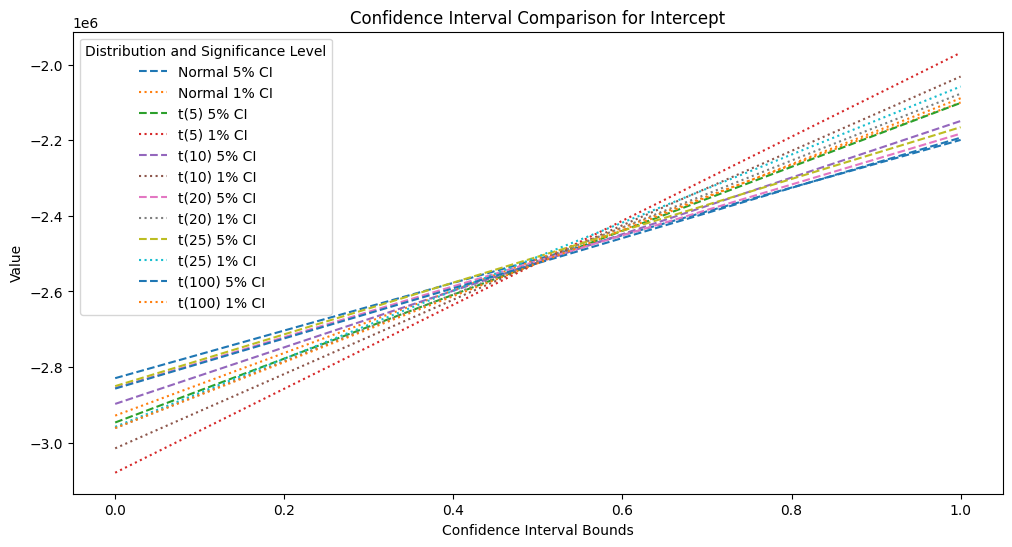

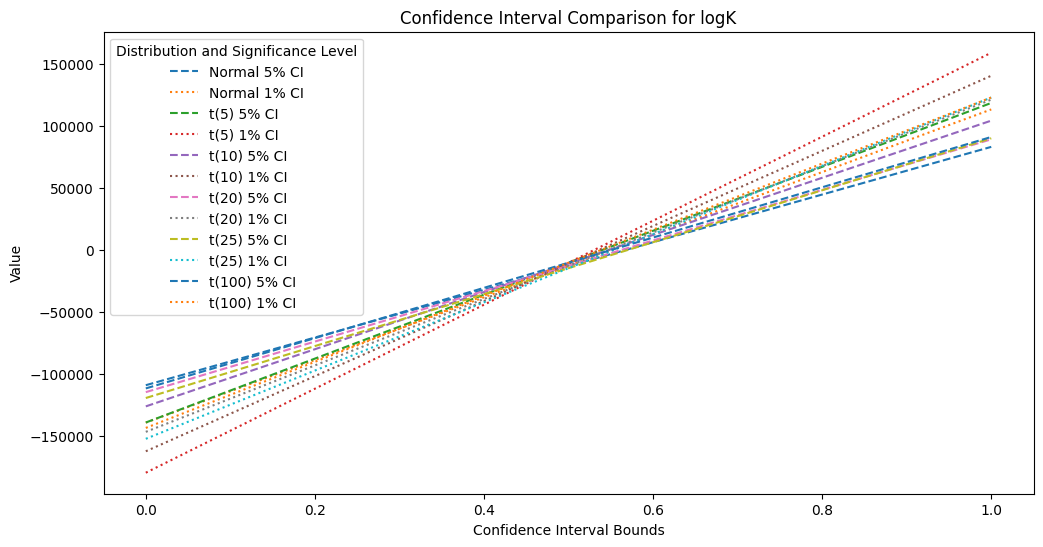

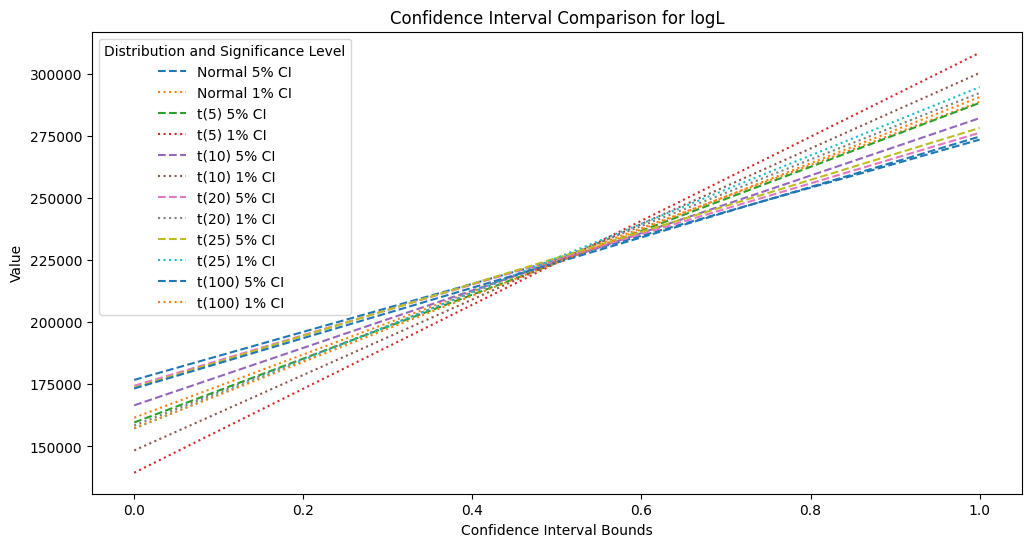

In [ ]:
from scipy.stats import norm
significance_levels = [0.05, 0.01]  # 5% and 1% significance
z_scores = {f"{alpha * 100:.0f}%": norm.ppf(1 - alpha / 2) for alpha in significance_levels}

# Param CIs
parametric_CIs = {}
for level, z in z_scores.items():
    parametric_CIs[level] = pd.DataFrame({
        "Lower": model.params - z * model.bse,
        "Upper": model.params + z * model.bse
    })

print("\nParametric Confidence Intervals:")
for level, ci in parametric_CIs.items():
    print(f"\n{level} Significance Level:")
    print(ci)

# MC CIs
monte_carlo_CIs = {}
for dist_name, params in mc_results.items():
    monte_carlo_CIs[dist_name] = {}
    for level, z in z_scores.items():
        monte_carlo_CIs[dist_name][level] = {
            param: {
                "Lower": np.mean(values) - z * np.std(values),
                "Upper": np.mean(values) + z * np.std(values),
            }
            for param, values in params.items()
        }

print("\nMonte Carlo Confidence Intervals:")
for dist_name, intervals in monte_carlo_CIs.items():
    print(f"\n{dist_name} Distribution:")
    for level, ci in intervals.items():
        print(f"\n{level} Significance Level:")
        for param, bounds in ci.items():
            print(f"{param}: Lower = {bounds['Lower']}, Upper = {bounds['Upper']}")



# plotting
for param in model.params.index:
    plt.figure(figsize=(12, 6))

    for dist_name, dist_intervals in monte_carlo_CIs.items():
        ci_5 = dist_intervals["5%"][param]
        ci_1 = dist_intervals["1%"][param]
        plt.plot([ci_5["Lower"], ci_5["Upper"]], label=f"{dist_name} 5% CI", linestyle="--")
        plt.plot([ci_1["Lower"], ci_1["Upper"]], label=f"{dist_name} 1% CI", linestyle=":")

    plt.title(f"Confidence Interval Comparison for {param}")
    plt.xlabel("Confidence Interval Bounds")
    plt.ylabel("Value")
    plt.legend(title="Distribution and Significance Level")
    plt.show()


Both confidence intervals show that the intervals are quite wide for the intercept. It shows us the inevitable uncertainty in estimating the baseline GDP. For log(K) and log(L), the 5% CI for log(K) is wider compared to log(L), indicating more uncertainty in estimating the effect of capital on GDP than labor. As the significance level goes from 5% to 1%, the intervals become narrower, suggesting higher precision but still variability, especially for the intercept. The Monte Carlo confidence intervals for each error distribution show similar trends but with some variations. For the Normal distribution, the CIs are narrower than for the t-distributions, as expected, because the normal distribution assumes no heavy tails. As the degrees of freedom  in the t-distribution increase from 5 to 100, the CIs become more similar to the normal case, as the t-distribution converges to the normal distribution with higher degrees of freedom. The CIs for the t(5) distribution are the widest, indicating more uncertainty in the estimates due to the heavier tails of the t-distribution with fewer degrees of freedom. The Monte Carlo simulation based on these error distributions suggests that with heavy-tailed errors like t(5), there is higher variability in the parameter estimates, and the resulting CIs reflect this increased uncertainty. Overall, these findings show how the assumption about the error distribution (normal vs. t-distributions) can significantly impact the precision and reliability of parameter estimates, especially when the sample size is small and error distributions deviate from normality.

## i.

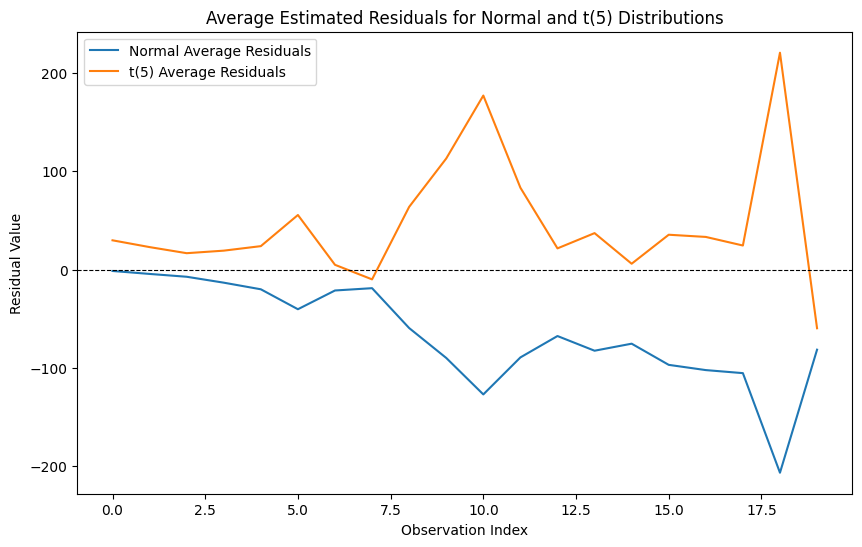

In [29]:
average_residuals = {}
for dist_name in ['Normal', 't(5)']:
    residuals = []
    for sim in range(simulations):
        simulated_gdp = (
            mc_results[dist_name]["Intercept"][sim] +
            mc_results[dist_name]["logK"][sim] * df1["logK"] +
            mc_results[dist_name]["logL"][sim] * df1["logL"]
        )
        residuals.append(simulated_gdp - model.predict())
    average_residuals[dist_name] = np.mean(residuals, axis=0)

# plotting
plt.figure(figsize=(10, 6))
for dist_name in ['Normal', 't(5)']:
    plt.plot(average_residuals[dist_name], label=f"{dist_name} Average Residuals")

plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Average Estimated Residuals for Normal and t(5) Distributions")
plt.xlabel("Observation Index")
plt.ylabel("Residual Value")
plt.legend()
plt.show()

## j.

In [30]:
# Number of simulations
n_trials = 100000

# Initialize storage for R^2 and Adjusted R^2
r2_results = {dist: [] for dist in error_distributions}
adj_r2_results = {dist: [] for dist in error_distributions}

# Simulate and compute R^2 and Adjusted R^2
for dist_name in error_distributions:
    for _ in range(n_trials):
        # Generate random errors
        if dist_name == 'Normal':
            errors = np.random.normal(0, sigma, len(df1))
        else:
            df = int(dist_name.split("(")[1].strip(")"))
            errors = np.random.standard_t(df, size=len(df1)) * sigma

        # Simulate GDP and fit model
        simulated_gdp = model.predict() + errors
        simulated_df = df1.copy()
        simulated_df['simulated_gdp'] = simulated_gdp
        sim_model = smf.ols(formula='simulated_gdp ~ logK + logL', data=simulated_df).fit()

        # Record R^2 and Adjusted R^2
        r2_results[dist_name].append(sim_model.rsquared)
        adj_r2_results[dist_name].append(sim_model.rsquared_adj)

# Compute averages
average_r2 = {dist: np.mean(values) for dist, values in r2_results.items()}
average_adj_r2 = {dist: np.mean(values) for dist, values in adj_r2_results.items()}

# Display results
print("\nAverage R^2 and Adjusted R^2 over 100,000 trials:")
for dist in error_distributions:
    print(f"\n{dist}:")
    print(f"  Average R^2: {average_r2[dist]:.4f}")
    print(f"  Average Adjusted R^2: {average_adj_r2[dist]:.4f}")



Average R^2 and Adjusted R^2 over 100,000 trials:

Normal:
  Average R^2: 0.9922
  Average Adjusted R^2: 0.9913

t(5):
  Average R^2: 0.9871
  Average Adjusted R^2: 0.9856

t(10):
  Average R^2: 0.9903
  Average Adjusted R^2: 0.9892

t(20):
  Average R^2: 0.9914
  Average Adjusted R^2: 0.9904

t(25):
  Average R^2: 0.9915
  Average Adjusted R^2: 0.9906

t(100):
  Average R^2: 0.9921
  Average Adjusted R^2: 0.9911


# Q2

In [ ]:
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
train_df = df1.iloc[:-10]
test_df = df1.iloc[-10:]

# Define models
models = {
    "M1": "gdp ~ logL + logK",
    "M2": "gdp ~ L + K",
    "M3": "gdp ~ logL + K",
    "M4": "gdp ~ L + logK",
}

# Initialize dictionaries to store results
train_mse = {}
test_mse = {}

# Fit models and calculate MSE
for model_name, formula in models.items():
    # Fit model on training data
    model = smf.ols(formula=formula, data=train_df).fit()

    # Predict on training and test data
    train_pred = model.predict(train_df)
    test_pred = model.predict(test_df)

    # Calculate MSE
    train_mse[model_name] = mean_squared_error(train_df["gdp"], train_pred)
    test_mse[model_name] = mean_squared_error(test_df["gdp"], test_pred)

# Display results
print("\nMSE Comparison:")
print("Training MSE:")
for model_name, mse in train_mse.items():
    print(f"{model_name}: {mse:.4f}")
print("\nTesting MSE:")
for model_name, mse in test_mse.items():
    print(f"{model_name}: {mse:.4f}")


ModuleNotFoundError: No module named 'sklearn'

The 4 models show different performances. And The MSE results reveal important insights about the performance of the different models on both the training and testing datasets. Model M1, which uses log-transformed labor and capital variables, achieved the highest training MSE and a significantly higher testing MSE. It suggests overfitting and it means this model fits the training data well but struggles to generalize to unseen data. Model M2, using raw labor and capital values, performed the best in terms of training MSE. It means it fits the training data well. While the testing MSE was still higher than the training MSE, the gap was smaller than that of M1. Thus it can generalize better. Model M3 and Model M4, which combine raw and log-transformed variables, exhibited moderate performance. M3 had a larger gap between training and testing MSE compared to M4, with M4 performing better in the test set. So it seems model 2 is the most reliable one for making predictions on new data and offering a good balance between fitting the training data.

# Q3

In [ ]:
# Define a function for LOOCV
def loocv(data, formula):
    errors = []
    for i in range(len(data)):
        # Split data into training and test sets (leave one out)
        train_data = data.drop(index=i)
        test_data = data.iloc[i:i+1]

        # Fit the model on training data
        model = smf.ols(formula=formula, data=train_data).fit()

        # Predict on test data
        prediction = model.predict(test_data)

        # Compute squared error
        error = (test_data["gdp"].values[0] - prediction.values[0]) ** 2
        errors.append(error)

    # Return LOOCV MSE
    return np.mean(errors)

# Perform LOOCV for each model
loocv_mse = {}
for model_name, formula in models.items():
    loocv_mse[model_name] = loocv(df1, formula)

# Display results
print("\nLOOCV MSE Comparison:")
for model_name, mse in loocv_mse.items():
    print(f"{model_name}: {mse:.4f}")



LOOCV MSE Comparison:
M1: 104917600.7096
M2: 70664229.0252
M3: 83962251.7208
M4: 29791532.6944


The Leave-One-Out Cross-Validation results provide clear evidence of differences in the predictive performance of the four models. Model M4 achieves the lowest LOOCV MSE (29,791,532.69). It means that the combination of raw labor and log-transformed capital offers the best predictive accuracy and generalization for this dataset. In contrast, Model M1, which employs log-transformation for both labor and capital, has the highest LOOCV MSE (104,917,600.71), suggesting it is the least effective at capturing the underlying relationships and generalizing to new observations. Model M2 performs significantly better than M1, with an LOOCV MSE of 70,664,229.03. It suggests that raw labor and capital variables are generally more predictive for this data. Model M3, a hybrid model with a log-transformed labor variable and raw capital, achieves an LOOCV MSE of 83,962,251.72, which is better than M1 but still inferior to M2 and M4. These findings suggest that log-transformation of capital provides meaningful improvement in prediction accuracy, while applying the same transformation to labor may hinder the model's performance. Overall, M4 emerges as the most robust model for predictive purposes in this context.

# Q4

In [ ]:
from sklearn.model_selection import KFold

# Function for k-fold CV
def k_fold_cv(data, formula, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=300)
    errors = []

    for train_index, test_index in kf.split(data):
        # Split data into training and test sets
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        # Fit the model on training data
        model = smf.ols(formula=formula, data=train_data).fit()

        # Predict on test data
        predictions = model.predict(test_data)

        # Compute MSE for the test fold
        mse = mean_squared_error(test_data["gdp"], predictions)
        errors.append(mse)

    # Return average MSE over all folds
    return np.mean(errors)

# Perform k-fold CV for each model
k_values = [2, 4]
k_fold_results = {k: {} for k in k_values}

for k in k_values:
    for model_name, formula in models.items():
        k_fold_results[k][model_name] = k_fold_cv(df1, formula, k)

# Display results
for k, results in k_fold_results.items():
    print(f"\n{k}-Fold CV MSE Comparison:")
    for model_name, mse in results.items():
        print(f"{model_name}: {mse:.4f}")



2-Fold CV MSE Comparison:
M1: 133744265.1678
M2: 136635701.9611
M3: 109175034.6301
M4: 28649800.3751

4-Fold CV MSE Comparison:
M1: 130633643.6014
M2: 109914994.8921
M3: 104917766.2975
M4: 27651538.0606


The results of the k-fold cross-validation for k=2 and k=4 reveal that Model M4 is the most robust and accurate model, achieving the lowest mean squared error across both folds: 28,649,800.38 for k=2 and 27,651,538.06 for k=4.  This highlights the advantage of combining raw labor (L) with log-transformed capital (log(K)) in predicting GDP.  Model M3 ranks second in performance, with lower MSEs compared to other alternatives, indicating that log-transforming labor while keeping capital in raw form offers a balance between complexity and predictive power. Model M2, which uses raw variables for both labor and capital, shows improvement when increasing the number of folds, with MSEs decreasing from 136,635,701.96 for k=2 to 109,914,994.89 for k=4. It suggests a sensitivity to fold size and a tendency to overfit with fewer training samples. Conversely, Model M1 consistently performs the worst, with MSEs of 133,744,265.17 for k=2 and 130,633,643.60 for k=4. So, applying log-transformations to both variables is not well-suited to this dataset. Overall, M4 emerges as the winner for minimizing prediction error, with consistent performance across both fold sizes, while M1 demonstrates the weakest predictive capabilities due to its inappropriate transformation strategy.

# Q5

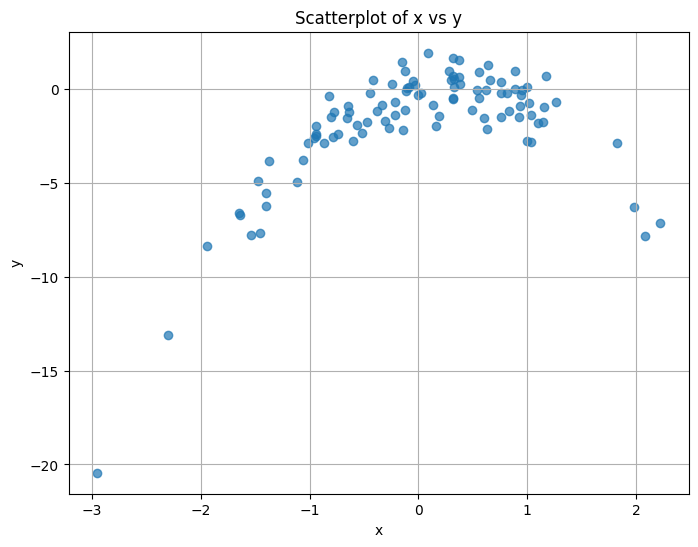


LOOCV Errors for Polynomial Models:
M1: 8.4604
M2: 1.0347
M3: 1.0600
M4: 1.0683

LOOCV Errors for Polynomial Models (New Seed):
M1: 8.4047
M2: 1.0714
M3: 1.0907
M4: 1.1341


In [ ]:
from sklearn.model_selection import LeaveOneOut
# a
np.random.seed(2022)
x = np.random.normal(0, 1, 100)
y = x - 2 * x**2 + np.random.normal(0, 1, 100)

# b
data = pd.DataFrame({"x": x, "y": y})

plt.figure(figsize=(8, 6))
plt.scatter(data["x"], data["y"], alpha=0.7)
plt.title("Scatterplot of x vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# c
polynomial_models = {
    "M1": "y ~ x",
    "M2": "y ~ x + I(x**2)",
    "M3": "y ~ x + I(x**2) + I(x**3)",
    "M4": "y ~ x + I(x**2) + I(x**3) + I(x**4)",
}

np.random.seed(2023)
def loocv_simulated(data, formula):
    loo = LeaveOneOut()
    errors = []

    for train_index, test_index in loo.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        model = smf.ols(formula=formula, data=train_data).fit()
        prediction = model.predict(test_data)
        error = (test_data["y"].values[0] - prediction.values[0]) ** 2
        errors.append(error)
    return np.mean(errors)

loocv_errors = {}
for model_name, formula in polynomial_models.items():
    loocv_errors[model_name] = loocv_simulated(data, formula)

print("\nLOOCV Errors for Polynomial Models:")
for model_name, error in loocv_errors.items():
    print(f"{model_name}: {error:.4f}")

# d
np.random.seed(2024)
x_new = np.random.normal(0, 1, 100)
y_new = x_new - 2 * x_new**2 + np.random.normal(0, 1, 100)
data_new = pd.DataFrame({"x": x_new, "y": y_new})
loocv_errors_new = {}
for model_name, formula in polynomial_models.items():
    loocv_errors_new[model_name] = loocv_simulated(data_new, formula)

print("\nLOOCV Errors for Polynomial Models (New Seed):")
for model_name, error in loocv_errors_new.items():
    print(f"{model_name}: {error:.4f}")


d) The results for LOOCV errors obtained using the new random seed in part d differ slightly from the results obtained in part c. The differences occur because the data generated in each case is based on a different random seed and it means different random noise added to the simulated  y-values. Since the y-values are slightly different due to the new noise, the models fitted to the data (M1, M2, M3, M4) will have slightly different coefficients and predictions. Consequently, the squared errors calculated during LOOCV will also differ, leading to slightly different average LOOCV errors. Despite the differences, the relative pattern of LOOCV errors across models is consistent. This suggests that the performance of each model remains broadly consistent across datasets, even with different random noise.


e. In part c, the model with the smallest LOOCV error is M2, with an error of 1.0347. The true data-generating function for y is y = x − 2x^2 + noise. This means that  y depends on  x and  x^2 , and the noise is normally distributed around zero. Among the models tested: M1 (linear) is too simple and does not account for the quadratic term (x^2 ), so it has a high LOOCV error. M2 explicitly includes the terms x and x^2 , making it closest to the true data-generating process. Hence, it achieves the smallest LOOCV error. M3 and M4 add higher-order terms that are unnecessary. These terms increase the model complexity and lead to overfitting, which slightly increases their LOOCV errors compared to M2. It is expected that M2 would perform the best because it matches the true underlying relationship without adding unnecessary complexity. Models like M3 and M4, while more flexible, include terms that the true data-generating process does not require. This extra flexibility increases the likelihood of overfitting, which worsens performance on unseen data (as reflected in their LOOCV errors). Therefore, the smallest LOOCV error for M2 confirms the importance of selecting a model that appropriately balances complexity and fit. Including terms that reflect the true data-generating process, but not adding unnecessary complexity, typically results in the best cross-validation performance.




f. When evaluating the statistical significance of the coefficients in each of the models in part (c) using least squares, the p-values provide insight into the relevance of the predictors. Comparing these results with the LOOCV findings reveals the following: M1 (Linear Model) assumes a simple linear relationship. While the coefficient for x may be statistically significant due to its partial ability to explain y, the model fails to capture the true non-linear nature of the data. This is evident in its high residual errors and correspondingly high LOOCV error, indicating a poor fit overall. M2 (Quadratic Model) incorporates the x^2 term, which is part of the true data-generating process. As a result, both the coefficients for x and x^2 are expected to have low p-values, reflecting their statistical significance. This aligns with the LOOCV result, where M2 achieves the smallest LOOCV error, confirming it as the most accurate representation of the underlying data. M3 (Cubic Model) introduces an additional x^3 term that is not part of the true process. While the coefficients for x and x^2 remain significant, the coefficient for x^3 may have a higher p-value, indicating that it is not statistically significant. This unnecessary term slightly increases the LOOCV error compared to M2, suggesting overfitting. M4 (Quartic Model) adds an even higher-order term x^4, which is also irrelevant to the data-generating process. The coefficients for x^3 and x^4 are likely to have high p-values, indicating they are not significant. This further inflates the LOOCV error, confirming that the model overfits the data more than M3. The statistical significance of the coefficients supports the conclusions drawn from LOOCV. M2, which aligns with the true quadratic nature of the data, is both the best-fitting model in terms of LOOCV error and has the most statistically significant coefficients. Models M3 and M4 demonstrate diminishing returns by introducing unnecessary complexity, while M1 fails to adequately model the non-linear relationship.


# Q6

Population Correlation (SAT, GPA): 0.7560


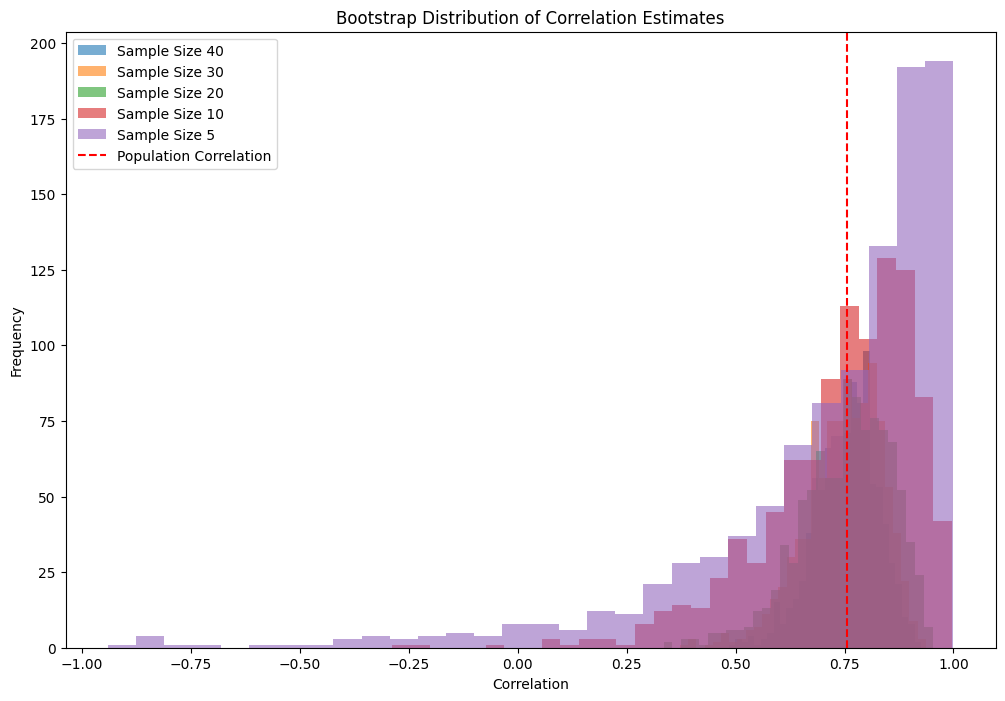


Quantiles for Population Correlation:
99%: 0.8525
95%: 0.8229
90%: 0.8105
10%: 0.6953
5%: 0.6687
1%: 0.6296

Quantiles for Bootstrapped Samples:

Sample Size 40:
99%: 0.8931
95%: 0.8606
90%: 0.8406
10%: 0.6665
5%: 0.6256
1%: 0.5509

Sample Size 30:
99%: 0.9035
95%: 0.8715
90%: 0.8496
10%: 0.6294
5%: 0.5916
1%: 0.4777

Sample Size 20:
99%: 0.9272
95%: 0.8954
90%: 0.8773
10%: 0.6164
5%: 0.5652
1%: 0.4393

Sample Size 10:
99%: 0.9731
95%: 0.9506
90%: 0.9219
10%: 0.4983
5%: 0.4117
1%: 0.2059

Sample Size 5:
99%: 0.9954
95%: 0.9839
90%: 0.9627
10%: 0.3563
5%: 0.1110
1%: -0.4029

Hypothesis Testing for ρ=0.75 (Sample Size 18):
P-value: 0.0933

95% Confidence Interval for ρ (Sample Size 18):
Lower Bound: 0.4495, Upper Bound: 0.9198


In [ ]:
# a
population_corr = np.corrcoef(df2["SAT"], df2["GPA"])[0, 1]
print(f"Population Correlation (SAT, GPA): {population_corr:.4f}")

def bootstrap_corr(data, sample_size, n_iterations=1000):
    correlations = []
    for _ in range(n_iterations):
        sample = data.sample(n=sample_size, replace=True)
        corr = np.corrcoef(sample["SAT"], sample["GPA"])[0, 1]
        correlations.append(corr)
    return correlations

sample_sizes = [40, 30, 20, 10, 5]
bootstrap_results = {}
for size in sample_sizes:
    bootstrap_results[size] = bootstrap_corr(df2, size)

# b
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for size in sample_sizes:
    plt.hist(bootstrap_results[size], bins=30, alpha=0.6, label=f"Sample Size {size}")
plt.axvline(population_corr, color='red', linestyle='--', label="Population Correlation")
plt.title("Bootstrap Distribution of Correlation Estimates")
plt.xlabel("Correlation")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# c
quantiles = [99, 95, 90, 10, 5, 1]
population_quantiles = np.percentile(bootstrap_corr(df2, len(df2)), quantiles)
bootstrap_quantiles = {size: np.percentile(bootstrap_results[size], quantiles) for size in sample_sizes}

print("\nQuantiles for Population Correlation:")
for q, val in zip(quantiles, population_quantiles):
    print(f"{q}%: {val:.4f}")

print("\nQuantiles for Bootstrapped Samples:")
for size, quant_vals in bootstrap_quantiles.items():
    print(f"\nSample Size {size}:")
    for q, val in zip(quantiles, quant_vals):
        print(f"{q}%: {val:.4f}")

# d
n_sample = 18
n_iterations = 1000
rho_null = 0.75

bootstrap_corr_18 = bootstrap_corr(df2, n_sample, n_iterations)
p_value = np.mean([abs(rho - rho_null) for rho in bootstrap_corr_18])

print(f"\nHypothesis Testing for ρ=0.75 (Sample Size 18):")
print(f"P-value: {p_value:.4f}")

# e
ci_95 = np.percentile(bootstrap_corr_18, [2.5, 97.5])
print("\n95% Confidence Interval for ρ (Sample Size 18):")
print(f"Lower Bound: {ci_95[0]:.4f}, Upper Bound: {ci_95[1]:.4f}")


#### Part B

The histogram plot illustrates the bootstrap distribution of correlation estimates for various sample sizes (40, 30, 20, 10, 5). From the plot we see that as sample size decreases, the spread (variance) of the bootstrap distributions increases significantly. Larger sample sizes (e.g., 40) generate narrower, more concentrated distributions, which indicates higher precision and producing estimates that are closer to the population correlation (marked by the red dashed line). On the other hand, smaller sample sizes (e.g., 5) result in wider distributions, which reflects greater variability, increased uncertainty, and a higher likelihood of extreme (edge) values. 

Larger sample sizes are usually better for bootstrapping because they're more stable and reliable. However, if we don’t have much data, smaller sample sizes can still work, but we have to be aware that they can be a lot more variable. In the end, if we can use a larger sample size —like 30 or 40— we'll likely get more trustworthy bootstrap results. But if we have to deal with smaller samples, we need to be careful when interpreting the results since there's more uncertainty involved.

#### Part C

The quantiles for the population correlation, analyzed using the complete dataset (N = 82), reveal that the correlation values are quite closely grouped (for example, the 99% quantile is 0.8525 while the 1% quantile is 0.6296). This suggests that when we utilize the entire dataset, the precision and stability of our estimates are high. When we look at larger sample sizes, such as 40, the bootstrap quantiles align closely with population quantiles, giving us a better representation of the true correlation. On the other hand, as the sample size becomes smaller (like 10 or 5), we see a notable increase in the spread of the quantiles, which indicates more variability and uncertainty in our estimates. For example, with a sample size of just 5, the 99% quantile rises to 0.9035, whereas the 1% quantile drops to 0.5509, highlighting the challenges small samples face in accurately reflecting the true population correlation. Overall, it’s clear that relying on the full dataset or larger sample sizes leads to more precise and trustworthy quantiles, while smaller samples can lead to greater variability and should be interpreted with caution.

# Q7

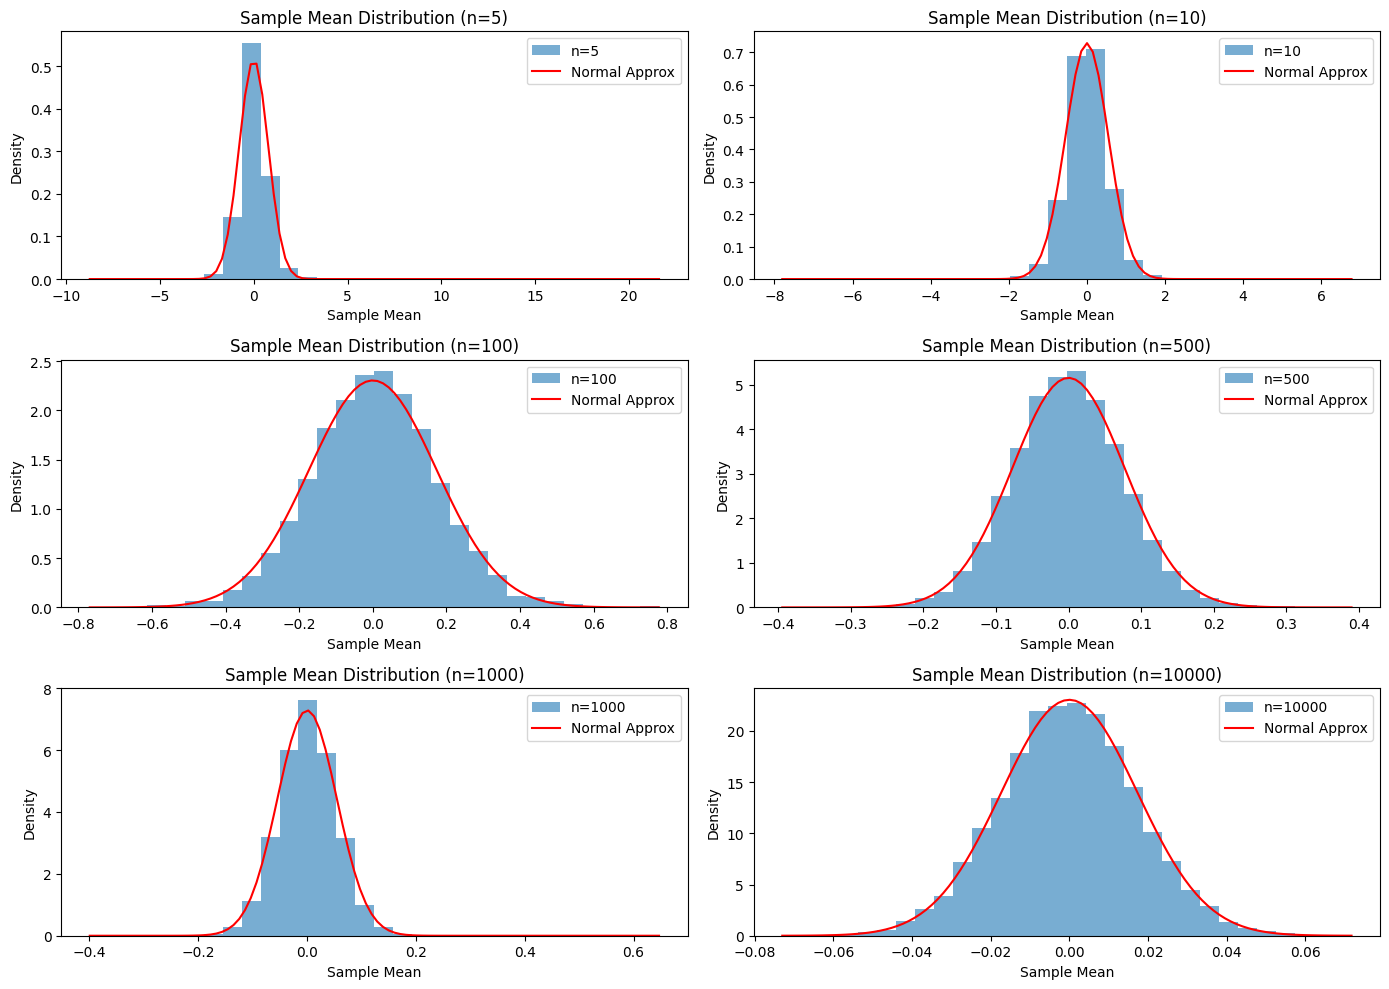


Summary for t-distribution:
Sample Size 5:
  Empirical Mean: -0.0001, Theoretical Mean: 0.0000
  Empirical Variance: 0.6084, Theoretical Variance: 0.0003
Sample Size 10:
  Empirical Mean: -0.0007, Theoretical Mean: 0.0000
  Empirical Variance: 0.2940, Theoretical Variance: 0.0003
Sample Size 100:
  Empirical Mean: 0.0041, Theoretical Mean: 0.0000
  Empirical Variance: 0.0293, Theoretical Variance: 0.0003
Sample Size 500:
  Empirical Mean: -0.0014, Theoretical Mean: 0.0000
  Empirical Variance: 0.0058, Theoretical Variance: 0.0003
Sample Size 1000:
  Empirical Mean: 0.0007, Theoretical Mean: 0.0000
  Empirical Variance: 0.0029, Theoretical Variance: 0.0003
Sample Size 10000:
  Empirical Mean: -0.0003, Theoretical Mean: 0.0000
  Empirical Variance: 0.0003, Theoretical Variance: 0.0003


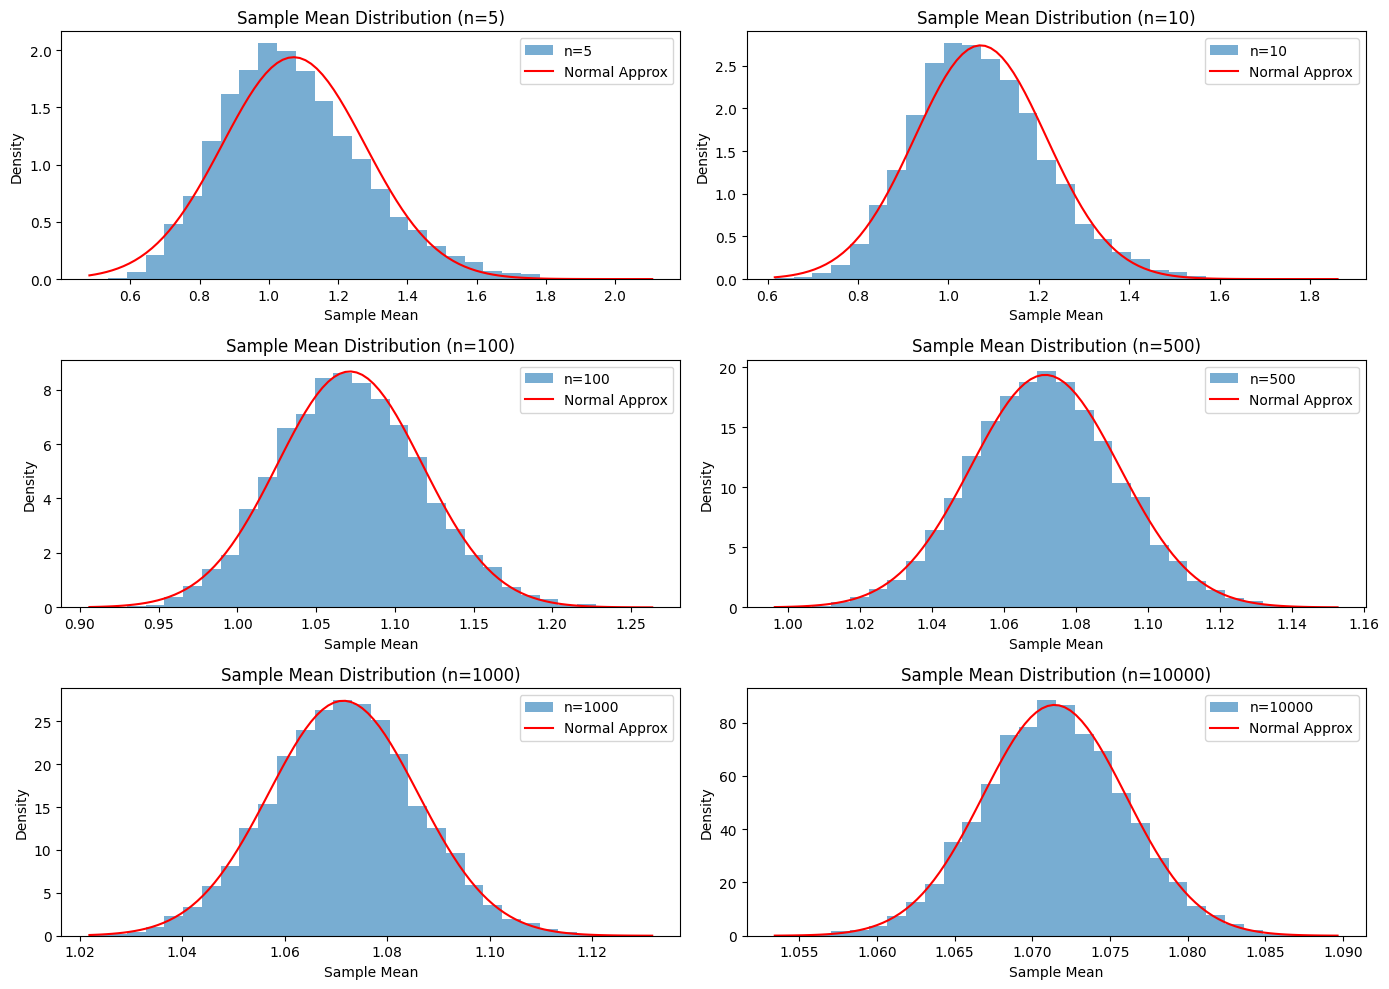


Summary for F-distribution:
Sample Size 5:
  Empirical Mean: 1.0715, Theoretical Mean: 1.0714
  Empirical Variance: 0.0424, Theoretical Variance: 0.0000
Sample Size 10:
  Empirical Mean: 1.0712, Theoretical Mean: 1.0714
  Empirical Variance: 0.0209, Theoretical Variance: 0.0000
Sample Size 100:
  Empirical Mean: 1.0716, Theoretical Mean: 1.0714
  Empirical Variance: 0.0021, Theoretical Variance: 0.0000
Sample Size 500:
  Empirical Mean: 1.0712, Theoretical Mean: 1.0714
  Empirical Variance: 0.0004, Theoretical Variance: 0.0000
Sample Size 1000:
  Empirical Mean: 1.0716, Theoretical Mean: 1.0714
  Empirical Variance: 0.0002, Theoretical Variance: 0.0000
Sample Size 10000:
  Empirical Mean: 1.0714, Theoretical Mean: 1.0714
  Empirical Variance: 0.0000, Theoretical Variance: 0.0000


In [ ]:
from scipy.stats import t, f

# Settings
sample_sizes = [5, 10, 100, 500, 1000, 10000]
n_simulations = 10000  # Number of simulations per sample size

# Function to demonstrate CLT
def demonstrate_clt(distribution, params, sample_sizes, n_simulations, dist_name):
    plt.figure(figsize=(14, 10))
    theoretical_means = []
    empirical_means = []
    empirical_vars = []

    for i, n in enumerate(sample_sizes):
        # Generate data
        if dist_name == "t":
            samples = t.rvs(params['df'], size=(n_simulations, n))
        elif dist_name == "F":
            samples = f.rvs(params['df1'], params['df2'], size=(n_simulations, n))
        else:
            raise ValueError("Unsupported distribution")

        # Compute sample means
        sample_means = np.mean(samples, axis=1)

        # Calculate theoretical mean and variance
        if dist_name == "t":
            theoretical_mean = 0  # Mean of t-distribution
            theoretical_var = params['df'] / (params['df'] - 2) if params['df'] > 2 else np.inf
        elif dist_name == "F":
            df1, df2 = params['df1'], params['df2']
            theoretical_mean = df2 / (df2 - 2) if df2 > 2 else np.inf
            theoretical_var = (2 * (df2**2) * (df1 + df2 - 2)) / (df1 * (df2 - 2)**2 * (df2 - 4)) if df2 > 4 else np.inf

        # Adjust variance for sample size
        adjusted_var = theoretical_var / n if np.isfinite(theoretical_var) else np.inf

        # Store empirical results
        empirical_mean = np.mean(sample_means)
        empirical_var = np.var(sample_means)
        empirical_means.append(empirical_mean)
        empirical_vars.append(empirical_var)
        theoretical_means.append(theoretical_mean)

        # Plot sample mean distribution
        plt.subplot(3, 2, i + 1)
        plt.hist(sample_means, bins=30, density=True, alpha=0.6, label=f"n={n}")
        x = np.linspace(np.min(sample_means), np.max(sample_means), 100)
        plt.plot(x, norm.pdf(x, loc=theoretical_mean, scale=np.sqrt(adjusted_var)), label="Normal Approx", color="red")
        plt.title(f"Sample Mean Distribution (n={n})")
        plt.xlabel("Sample Mean")
        plt.ylabel("Density")
        plt.legend()

    plt.tight_layout()
    plt.show()

    # Print summary
    print(f"\nSummary for {dist_name}-distribution:")
    for i, n in enumerate(sample_sizes):
        print(f"Sample Size {n}:")
        print(f"  Empirical Mean: {empirical_means[i]:.4f}, Theoretical Mean: {theoretical_means[i]:.4f}")
        print(f"  Empirical Variance: {empirical_vars[i]:.4f}, Theoretical Variance: {adjusted_var:.4f}")

np.random.seed(136)
demonstrate_clt(distribution=t, params={"df": 3}, sample_sizes=sample_sizes, n_simulations=n_simulations, dist_name="t")
demonstrate_clt(distribution=f, params={"df1": 20, "df2": 30}, sample_sizes=sample_sizes, n_simulations=n_simulations, dist_name="F")


#### Part C

For the t-distribution, the empirical means across all sample sizes closely match the theoretical mean of 0, which confirms that the sample mean is an unbiased estimator. Similarly, for the F-distribution, the empirical means align with the theoretical mean of 1.0714, regardless of sample size. However, the variability in sample means, (empirical variance), decreases significantly as the sample size increases for both distributions. For smaller sample sizes (n = 5, 10), the distributions of sample means are more spread out and deviate from normal, still holding characteristics of the original distributions, like the heavy tails of the t-distribution or the skewness of the F-distribution. As the sample size increases (n = 100, 500, 1000, 10000), the sample mean distributions converge closely to a normal distribution, like we can see on the histograms, and the empirical variance approaches the expected theoretical variance divided by n. These findings confirm the Central Limit Theorem (CLT), which predicts that the sample mean distribution becomes more normal as the sample size grows, regardless of the population distribution.

#### Part D

The results make it clear why the CLT is so important in statistics. It allows us to use normal approximations for large sample sizes, even when the population itself isn’t normal. For small sample sizes, the sample means don’t behave as predictably—they’re more variable, and their distributions don’t look normal, which means methods that rely on normality might not work well. But as the sample size gets larger, the sample mean distribution always converges to a normal shape, and the variability shrinks. This makes it possible to use tools like confidence intervals and hypothesis tests reliably, which is why the CLT is so central to statistical inference, especially when working with large datasets.